# Customer satisfaction of Icecream Flavours


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/tec03/Datasets/main/datasets/satis.csv')
mpl.style.use('ggplot')  # optional: for ggplot-like style

In [3]:
df.head(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,33.0,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,39.0,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


Let's check how many missing values are there in each column:

In [4]:
df.isnull().sum()

Age                     5
Gender                  5
Ocupation               5
Monthly income          5
Price                   5
Quality                 5
Quantity                5
Availability            5
Taste                   5
Flavours                5
Customer relation       5
Customer services       5
Texture                 5
Size                    5
Overal satisfaction     5
Consistency             5
Factor                  5
Frowned                 5
reason                 23
Popular                 5
My favorite             5
Kind                    5
Preference              5
Recommend               5
dtype: int64

Let's check how many missing values are there in each Row: 

In [5]:
df.iloc[:, :].isna().sum(1)

0      1
1      0
2      1
3      1
4      1
5      0
6      0
7      1
8      0
9      1
10     0
11     1
12     0
13     0
14     0
15     1
16     0
17     0
18     0
19     0
20     1
21     0
22     0
23     1
24     0
25     1
26     1
27     0
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     0
38     0
39     0
40     0
41     1
42     0
43     1
44     1
45     0
46     0
47     0
48     0
49     0
50    24
51    24
52    24
53    24
54    24
dtype: int64

- We see that there are at least 5 data is missing in each column. 

Let us drop the columns and rows, if the entire data is missing: 

In [6]:
df.dropna(axis = 1, how = 'all', inplace = True)
df.dropna(how = 'all', inplace = True)

In [7]:
df.isnull().sum()

Age                     0
Gender                  0
Ocupation               0
Monthly income          0
Price                   0
Quality                 0
Quantity                0
Availability            0
Taste                   0
Flavours                0
Customer relation       0
Customer services       0
Texture                 0
Size                    0
Overal satisfaction     0
Consistency             0
Factor                  0
Frowned                 0
reason                 18
Popular                 0
My favorite             0
Kind                    0
Preference              0
Recommend               0
dtype: int64

Let us drop the column `reason`, since 18 out of 50 data is missing:

In [8]:
df.drop('reason', 
        axis = 1, 
        inplace = True)
df.head(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Size,Overal satisfaction,Consistency,Factor,Frowned,Popular,My favorite,Kind,Preference,Recommend
0,33.0,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,4.0,Taste,No,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,39.0,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,2.0,4.0,4.0,Taste,No,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


We can convert `Age` to an `int` type : 

In [9]:
df['Age'] = df['Age'].astype(int)
df.head(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Size,Overal satisfaction,Consistency,Factor,Frowned,Popular,My favorite,Kind,Preference,Recommend
0,33,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,4.0,Taste,No,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,39,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,2.0,4.0,4.0,Taste,No,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


In [10]:
def custom_cls(x):
    if (0<= x <= 20):
        return '<=20'
    elif (21<= x <= 30):
        return '21 - 30'
    elif (31<= x <= 40):
        return '31 - 40'
    else:
        return '>=40'
        
df['AgeGP'] = df.apply(lambda tbl: custom_cls(tbl['Age']),
                       axis=1)
df.head(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,33,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,Taste,No,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31 - 40
1,39,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,Taste,No,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,31 - 40


In [11]:
dFast = df.copy()

In [12]:
counts = df['AgeGP'].value_counts()
type(counts)

counts = counts.to_frame()

Let's make a column of `%` for each age group. For, first we calculate the column sum. 
- The column sum of `AgeGP` *cs_AgeGP* is : 

In [13]:
counts.loc[:,'AgeGP']

21 - 30    30
<=20       11
31 - 40     7
>=40        2
Name: AgeGP, dtype: int64

In [14]:
cs_AgeGP  = counts.loc[:,'AgeGP'].sum(axis=0)
cs_AgeGP

50

In [15]:
counts['%'] = (counts.iloc[:,:]/cs_AgeGP)*100
counts

,AgeGP,%
21 - 30,30,60.0
<=20,11,22.0
31 - 40,7,14.0
>=40,2,4.0


Since this `counts` data frame is in decending order of `%` column, we reindex in ascending order of Age Group in index: 

In [16]:
counts.index

Index(['21 - 30', '<=20', '31 - 40', '>=40'], dtype='object')

In [17]:
counts = counts.reindex(["<=20", "21 - 30", "31 - 40", ">=40"])
counts

,AgeGP,%
<=20,11,22.0
21 - 30,30,60.0
31 - 40,7,14.0
>=40,2,4.0


To make the `index` as a colum, we may use `reset_index()` function, as:

In [18]:
counts = counts.reset_index()
counts

,index,AgeGP,%
0,<=20,11,22.0
1,21 - 30,30,60.0
2,31 - 40,7,14.0
3,>=40,2,4.0


In [19]:
counts = counts.rename({'index': 'Age_group'}, 
                       axis=1
                      )  
counts

,Age_group,AgeGP,%
0,<=20,11,22.0
1,21 - 30,30,60.0
2,31 - 40,7,14.0
3,>=40,2,4.0


Now, we make a pie chart. 

- Each slice represent the size of the corresponding value in the column
- Defalut label is index
    - we can specify any column as label

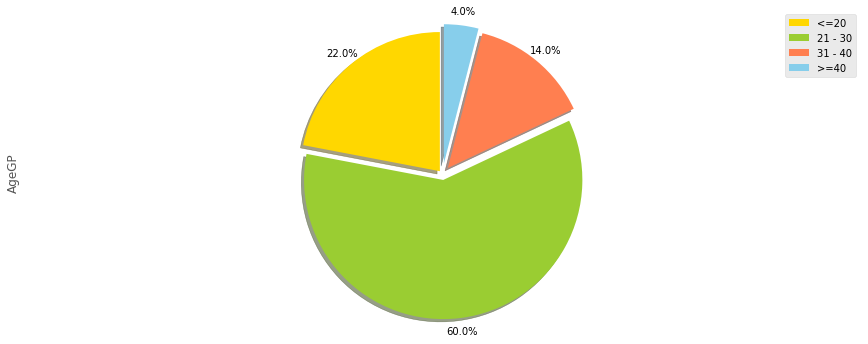

In [20]:
explode_list = [0.03, 0.04, 0.06, 0.08] # ratio for each continent with which to offset each wedge.
colors_list  = ['gold', 'yellowgreen', 'coral', 'skyblue', 'lightgreen', 'pink']

counts['AgeGP'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%', 
                           startangle=90,    
                           shadow=True,       
                           labels=None,                  # turn off labels on pie chart
                           pctdistance=1.1,              # the ratio between the pie center and start of text label
                           explode=explode_list,         # 'explode' lowest 3 continents
                           colors=colors_list, 
                         )

plt.axis('equal')
plt.legend(labels=counts.Age_group, 
           bbox_to_anchor=(1.0,1.0));  # add legend

The same information in a barchart would be like: 

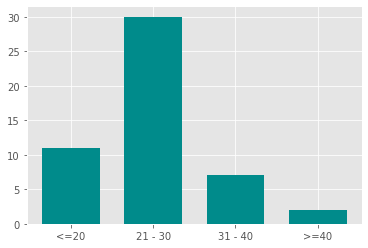

In [21]:
x = list(counts['Age_group'])
y = list(counts['AgeGP'])
plt.bar(x, y, width=0.7, color= 'darkcyan');

Now the pie chart and the barchart, side by side for easy comparison: 

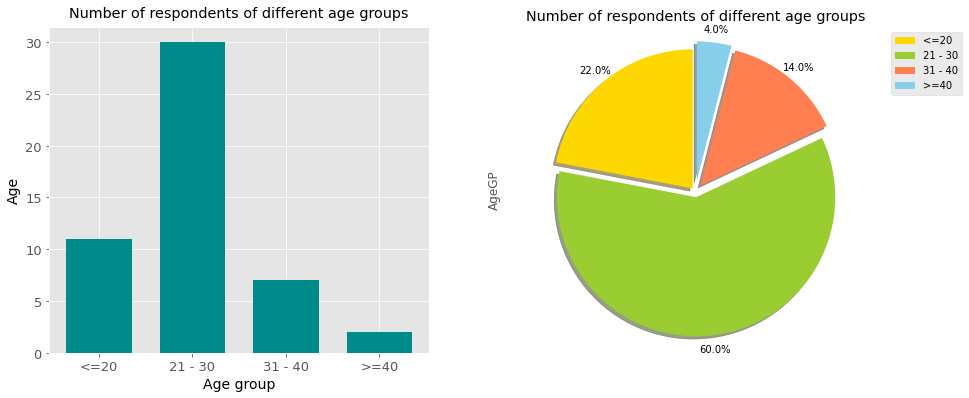

In [22]:
x = list(counts['Age_group'])
y = list(counts['AgeGP'])
plt.rcParams["figure.figsize"] = (15,7)


plt.subplot(1,2,1)

plt.bar(x, y, width=0.7, color= 'darkcyan')   #the barchart

plt.xlabel('Age group', fontweight='regular', color = 'black', fontsize='14', horizontalalignment='center')
plt.ylabel('Age', fontweight='regular', color = 'black', fontsize='14', horizontalalignment='center')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of respondents of different age groups', y = 1.01)


plt.subplot(1,2,2)


explode_list = [0.03, 0.04, 0.06, 0.08] # ratio for each continent with which to offset each wedge.
colors_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'lightgreen', 'pink']

counts['AgeGP'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%', 
                           startangle=90,    
                           shadow=True,       
                           labels=None,                  # turn off labels on pie chart
                           pctdistance=1.1,              # the ratio between the pie center and start of text label
                           explode=explode_list,         # 'explode' lowest 3 continents
                           colors=colors_list, 
                         )

plt.axis('equal') 

plt.legend(labels=counts.Age_group, 
           bbox_to_anchor=(1.0,1.0))  # add legend
plt.title('Number of respondents of different age groups', y=1)

plt.savefig('Outputs/images/age_group1.png')
plt.show()

Alternatively: 

In [23]:
df_grouped = dFast.groupby(['AgeGP']).count()
df_grouped

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Size,Overal satisfaction,Consistency,Factor,Frowned,Popular,My favorite,Kind,Preference,Recommend
AgeGP,,,,,,,,,,,,,,,,,,,,,
21 - 30,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
31 - 40,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
<=20,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
>=40,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [24]:
df_grouped.index

Index(['21 - 30', '31 - 40', '<=20', '>=40'], dtype='object', name='AgeGP')

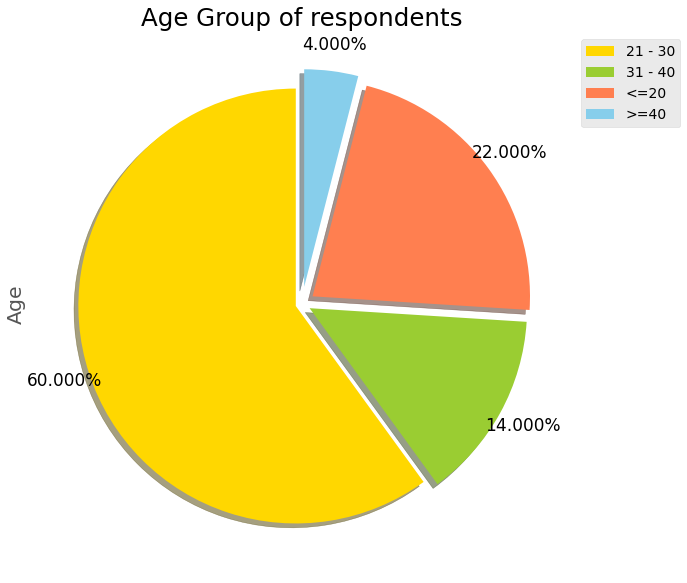

In [25]:
explode_list = [0.03, 0.04, 0.06, 0.08] # ratio for each continent with which to offset each wedge.
colors_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'lightgreen', 'pink']

mpl.rcParams['font.size'] = 17.0

dFast.groupby(['AgeGP']).count().plot(kind='pie',
                                      y='Age',
                                      fontsize = 17,
                                      figsize=(15,10),
                                      autopct='%1.3f%%',
                                      startangle=90,
                                      shadow=True,
                                      labels=None,                 # turn off labels on pie chart
                                      pctdistance=1.12,            # the ratio between the pie center and start of text label
                                      explode=explode_list,        # 'explode' lowest 3 continents
                                      colors=colors_list,
                                      title='Age Group of respondents'
                                     )
plt.legend(labels=df_grouped.index, 
           bbox_to_anchor=(1.0,1.0), 
           fontsize = 14) 
plt.show()

alternatevely: 

In [26]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
exps   = [0.05, 0.05, 0.02, 0.02]

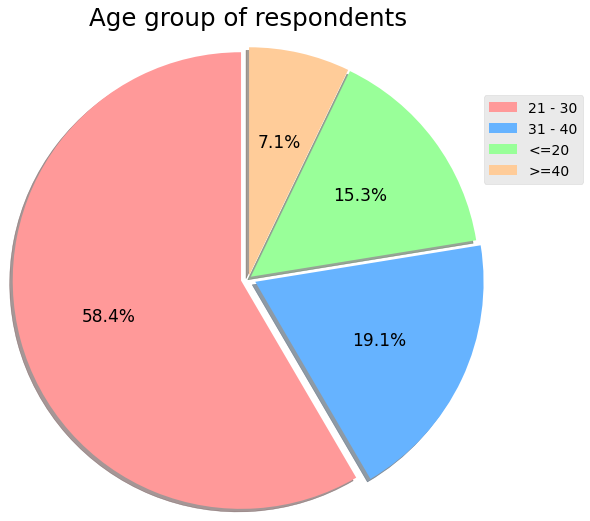

In [27]:
dFast.groupby(['AgeGP']).sum().plot(kind='pie', y='Age', 
                                    autopct='%1.1f%%', 
                                    radius=1.5, 
                                    shadow=True, 
                                    explode=exps, 
                                    colors=colors,
                                    ylabel='', 
                                    labeldistance=None, 
                                    startangle = 90
                                   )
plt.legend(bbox_to_anchor=(1.1,1.0), 
           fontsize = 14)
plt.title('Age group of respondents', y=1.15);

To see the gender in each age group:

In [28]:
df.columns

Index(['Age', 'Gender', 'Ocupation', 'Monthly income', 'Price', 'Quality',
       'Quantity', 'Availability', 'Taste', 'Flavours', 'Customer relation',
       'Customer services', 'Texture', 'Size', 'Overal satisfaction',
       'Consistency', 'Factor', 'Frowned', 'Popular', 'My favorite', 'Kind',
       'Preference', 'Recommend', 'AgeGP'],
      dtype='object')

using value_counts fun. 

In [29]:
age_sex = df[['AgeGP', 'Gender']].value_counts()
age_sex = age_sex.to_frame()
age_sex

0
AgeGP   Gender    
21 - 30 Male    19
        Female  11
<=20    Male     6
31 - 40 Female   5
<=20    Female   5
31 - 40 Male     2
>=40    Female   1
        Male     1

alternatively, with groupby & size: 

In [30]:
age_gender = df.groupby(['AgeGP', 'Gender']).size()
age_gender = age_gender.to_frame()
age_gender

0
AgeGP   Gender    
21 - 30 Female  11
        Male    19
31 - 40 Female   5
        Male     2
<=20    Female   5
        Male     6
>=40    Female   1
        Male     1

alternatively, with pivot table:

In [31]:
age_sex3 = pd.pivot_table(index = ['AgeGP', 'Gender'],
                          aggfunc=len,
                          #values = '',
                          values = 'Availability',
                          data = df, 
                         margins = True)
age_sex3

Availability
AgeGP   Gender              
21 - 30 Female            11
        Male              19
31 - 40 Female             5
        Male               2
<=20    Female             5
        Male               6
>=40    Female             1
        Male               1
All                       50

In [32]:
age_gender = age_gender.rename(columns ={0: 'Count'})
age_gender = age_gender.reset_index()
age_gender

,AgeGP,Gender,Count
0,21 - 30,Female,11
1,21 - 30,Male,19
2,31 - 40,Female,5
3,31 - 40,Male,2
4,<=20,Female,5
5,<=20,Male,6
6,>=40,Female,1
7,>=40,Male,1


In [33]:
age_gender['%'] = (age_gender.iloc[:,2]/age_gender.iloc[:,2].sum())*100
age_gender

,AgeGP,Gender,Count,%
0,21 - 30,Female,11,22.0
1,21 - 30,Male,19,38.0
2,31 - 40,Female,5,10.0
3,31 - 40,Male,2,4.0
4,<=20,Female,5,10.0
5,<=20,Male,6,12.0
6,>=40,Female,1,2.0
7,>=40,Male,1,2.0


In [34]:
#plot_order = df.groupby('Age')['Sex'].sum().sort_values(ascending=False).index.values
plot_order = ['21 - 30',  '<=20', '31 - 40', '>40']

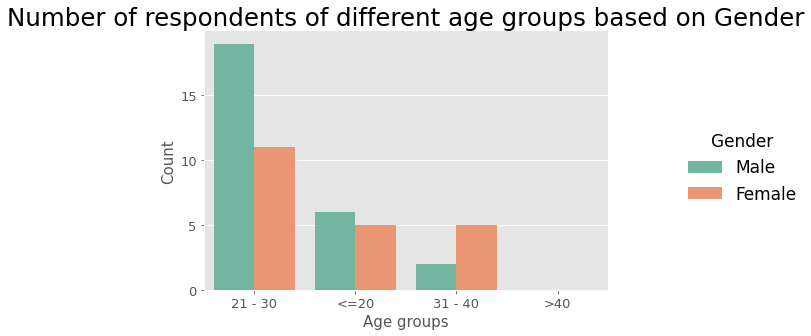

In [35]:
g = sns.catplot(x="AgeGP", 
            kind="count", 
            palette="Set2", 
            hue = 'Gender',
            data=df,
            #index=['<=20','21-30','31-40', '41-50']
            #order=df.model.value_counts().index
                height=10, 
                aspect=1.5,
                order = plot_order,
           )
g.fig.set_size_inches(7.2, 5)
g.fig.subplots_adjust(top=0.81, right=0.86)

ax = g.facet_axis(0, 0)

###for c in ax.containers:
###   labels = [f'{(v.get_height()):.0f}' for v in c]
###  ax.bar_label(c, labels=labels, label_type='edge', fontsize=12)
    
plt.xlabel('Age groups',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title('Number of respondents of different age groups based on Gender', y =1.1)

plt.savefig('age_gender.png')

plt.show()

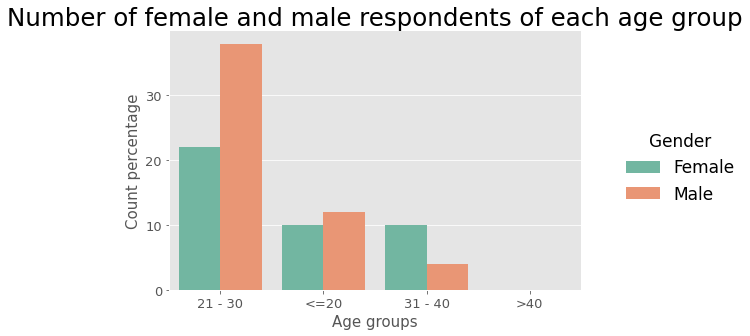

In [36]:
g = sns.catplot(x="AgeGP",  #Age	Sex	Count	%
                y = '%', 
                palette="Set2", 
                hue = 'Gender',
                data=age_gender,
                kind = 'bar',
                #index=['<=20','21-30','31-40', '41-50']
                #order=df.model.value_counts().index
                height=10, 
                aspect=1.5,
                order = plot_order,
               )
g.fig.set_size_inches(7.2, 5)
g.fig.subplots_adjust(top=0.81, right=0.86)

ax = g.facet_axis(0, 0)

###for c in ax.containers:
###    labels = [f'{(v.get_height()):.0f}' for v in c]
###    ax.bar_label(c, labels=labels, label_type='edge', fontsize=12)
    
plt.xlabel('Age groups',fontsize=15)
plt.ylabel('Count percentage',fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title('Number of female and male respondents of each age group', y =1.1)
plt.savefig('age_sex.png')

plt.savefig('age_group2.png')
plt.show()

In [37]:
age_gender

,AgeGP,Gender,Count,%
0,21 - 30,Female,11,22.0
1,21 - 30,Male,19,38.0
2,31 - 40,Female,5,10.0
3,31 - 40,Male,2,4.0
4,<=20,Female,5,10.0
5,<=20,Male,6,12.0
6,>=40,Female,1,2.0
7,>=40,Male,1,2.0


In [38]:
fig = px.sunburst(age_gender, 
                  path=['AgeGP','Gender','Count',], 
                  values='Count', 
                  color='AgeGP',
                  #color_discrete_map={'(?)':'black', 'Sex':'Orange', 'Count':'darkblue'},
                  title='Number of respondents of different age groups'
                 )

plt.savefig('age_group3.png')
fig.show();

<Figure size 1080x504 with 0 Axes>

### Satisfaction on PRICE of different age groups and Gender

In [39]:
price_pivt_pas = pd.pivot_table(data = df, 
                           index = ['Price','AgeGP','Gender'],
                           #values = 'Price',
                           aggfunc = 'size',
                           )
price_pivt_pas = price_pivt_pas.to_frame()
price_pivt_pas = price_pivt_pas.reset_index()
price_pivt_pas = price_pivt_pas.rename(columns ={0: 'Size'}
                 )
price_pivt_pas['%'] = (price_pivt_pas.iloc[:,3]/price_pivt_pas.loc[:,'Size'].sum(axis=0))*100
price_pivt_pas

,Price,AgeGP,Gender,Size,%
0,1.0,21 - 30,Female,1,2.0
1,2.0,21 - 30,Male,2,4.0
2,2.0,<=20,Male,3,6.0
3,3.0,21 - 30,Female,3,6.0
4,3.0,21 - 30,Male,8,16.0
5,3.0,31 - 40,Female,3,6.0
6,3.0,31 - 40,Male,1,2.0
7,3.0,<=20,Female,4,8.0
8,3.0,<=20,Male,1,2.0
9,4.0,21 - 30,Female,4,8.0


In [40]:
fig = px.sunburst(price_pivt_pas, 
                  path=[  'Gender', 'AgeGP','Price'], 
                  values='%', 
                  color='AgeGP',
                  color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'},
                  title='Satisfaction on PRICE of different age groups and Gender'
                 )
fig.update_traces(textinfo='label+percent entry')
plt.savefig('Outputs/images/age_group3.png')
fig.show()
#1

<Figure size 1080x504 with 0 Axes>

In [41]:
price_pivt_pas

,Price,AgeGP,Gender,Size,%
0,1.0,21 - 30,Female,1,2.0
1,2.0,21 - 30,Male,2,4.0
2,2.0,<=20,Male,3,6.0
3,3.0,21 - 30,Female,3,6.0
4,3.0,21 - 30,Male,8,16.0
5,3.0,31 - 40,Female,3,6.0
6,3.0,31 - 40,Male,1,2.0
7,3.0,<=20,Female,4,8.0
8,3.0,<=20,Male,1,2.0
9,4.0,21 - 30,Female,4,8.0


In [42]:
fig = px.sunburst(price_pivt_pas, 
                  path=['Price', 'AgeGP','Gender', ], 
                  values='%', 
                  color='AgeGP',
                  color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'},
                  title='Satisfaction on PRICE of different age groups and sex'
                 )
fig.update_traces(textinfo='label+percent entry')
plt.savefig('Outputs/images/age_group3.png')
fig.show()

<Figure size 1080x504 with 0 Axes>

In [43]:
fig = px.sunburst(price_pivt_pas, 
                  path=['Price', 'Gender', 'AgeGP',], 
                  values='%', 
                  color='AgeGP',
                  title='Satisfaction on PRICE of different age groups and sex'
                 )

fig.update_traces(textinfo='label+percent entry')
plt.savefig('Outputs/images/age_group3.png')
fig.show()

<Figure size 1080x504 with 0 Axes>

In [44]:
age_gender

,AgeGP,Gender,Count,%
0,21 - 30,Female,11,22.0
1,21 - 30,Male,19,38.0
2,31 - 40,Female,5,10.0
3,31 - 40,Male,2,4.0
4,<=20,Female,5,10.0
5,<=20,Male,6,12.0
6,>=40,Female,1,2.0
7,>=40,Male,1,2.0


In [45]:
fig = px.bar(age_gender, 
             y="AgeGP", 
             x="Count", 
             color="Gender", 
             orientation="h", 
             hover_name="AgeGP",
             color_discrete_sequence=["lightslategrey", "lightcyan"],
             category_orders={"AgeGP": ["21 - 30", "31 - 40", "<=20", ">=40"]},
             title="Explicit color mapping"
            )

fig.show()

<!--NAVIGATION-->
< [Previous](https://github.com/Egade/ClassNotes) 
| [Toc](https://github.com/Egade/ClassNotes) 
| [Next](https://github.com/Egade/ClassNotes) >